<a href="https://colab.research.google.com/github/sadman-02/SML-413/blob/main/SML_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

Temperature Scores (C): [15 17 16 14 18 20 19 15 21 22]
Mean: 17.70, Std Dev: 2.61
Test decision (h): 0
p-value: 0.9550
KS statistic: 0.1496


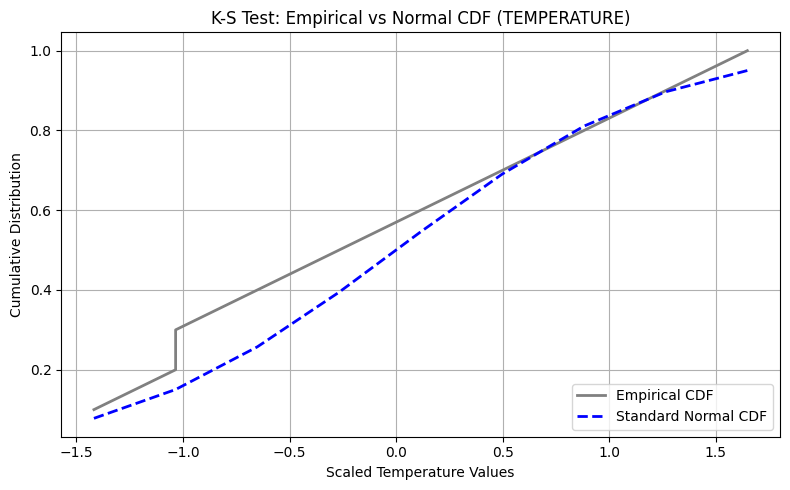

In [8]:
temps = np.array([15, 17, 16, 14, 18, 20, 19, 15, 21, 22])
print("Temperature Scores (C):", temps)

avg = np.mean(temps)
std_dev = np.std(temps)

standardized = (temps - avg) / std_dev
print(f"Mean: {avg:.2f}, Std Dev: {std_dev:.2f}")

ks_test = kstest(standardized, 'norm')
decision = int(ks_test.pvalue < 0.05)
print(f"Test decision (h): {decision}")
print(f"p-value: {ks_test.pvalue:.4f}")
print(f"KS statistic: {ks_test.statistic:.4f}")

sorted_vals = np.sort(standardized)
empirical_cdf = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)
theoretical_cdf = norm.cdf(sorted_vals)

plt.figure(figsize=(8, 5))
plt.plot(sorted_vals, empirical_cdf, label='Empirical CDF', color='grey', linewidth=2)
plt.plot(sorted_vals, theoretical_cdf, label='Standard Normal CDF', color='blue', linestyle='--', linewidth=2)
plt.title("K-S Test: Empirical vs Normal CDF (TEMPERATURE)")
plt.xlabel("Scaled Temperature Values")
plt.ylabel("Cumulative Distribution")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()